<h1 style="font-size: 5em; color: #0000FF; text-shadow: 4px 4px 4px #000000, 0 0 10px #0000FF, 0 0 20px #0000FF; text-align: center; font-weight: bold; text-transform: uppercase;">Customer Review Analysis by NLP
</h1>

## Business Context:

#### One of the leading woman clothing e-commerce companies would like to analyse the customer’ behaviour by analysing customer’s demographics and reviews submitted on the website.

## Business Objectives:

#### a. Performing exploratory analysis on the data to understand the patterns

#### b. Perform text mining tasks to understand what most frequent words are using for positive sentiment and negative sentiment. Create word clouds for the positive & negative reviews separately.

#### c. Understand sentiment among the customers on the different categories, sub categories, products by location and age group


#### d. Perform predictive analytics to understand the drivers of customers who are recommending the products. 


#### e.Create topics and understand themes behind the topics by performing topic mining.

#

In [55]:
# importing all library's metrics  for the model



import pandas as pd
import numpy as np
# For creating visualizations
import matplotlib.pyplot as plt
import seaborn as sns
#library for natural language processing tasks
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
## For converting text data into TF-IDF (Term Frequency-Inverse Document Frequency) vectors
from sklearn.feature_extraction.text import TfidfVectorizer
#For splitting data into training and testing sets
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score 
# For generating word clouds to visualize text data.
from wordcloud import WordCloud
# For calculating the frequency distribution of words in text data.
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel("D:/A LABS FLODER/ML using python/CASE STUDYS/Capstone Case Study - NLP- Woman Clothing E-Commerce Platform/Womens Clothing Reviews Data.xlsx")
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1


## cheching the no.of columns and rows in that data df 

In [3]:
print("In this data dataframe having " + str(len(data)) + " rows and " + str(len(data.columns)) + " columns are there")

In this data dataframe having 23486 rows and 11 columns are there


## Number of numerical & categorical columns in the data set

In [4]:
num_df=data.select_dtypes(exclude='object')
obj_df=data.select_dtypes(include='object')
no_of_numericals_columns=len(num_df.columns)
no_of_categorical_columns=len(obj_df.columns)
print("In the above data dataframe having "+ str(no_of_numericals_columns)+ " numericals_columns and "+ str(no_of_categorical_columns)+ " categorical_columns are there")

In the above data dataframe having 4 numericals_columns and 7 categorical_columns are there


# description about numericals_columns

In [5]:
def custom_description( x ):
    
    non_missing = x.isnull().count()
    missing = x.isnull().sum()
    missing_pct = missing / non_missing
    
    p25 = x.quantile(0.25)
    p75 = x.quantile(0.75)
    
    iqr = p75 - p25
    
    lc_iqr = p25 - 1.5 * iqr
    uc_iqr = p75 + 1.5 * iqr
    
    return pd.Series( [ x.dtypes, x.count(), x.nunique(), non_missing, missing, missing_pct, 
                       x.sum(), x.var(), x.std(), x.mean(), 
                       iqr, lc_iqr, uc_iqr, 
                       x.min(), x.quantile(0.01), x.quantile(0.05), x.quantile(0.10), 
                       x.quantile(0.25), x.quantile(0.50), x.quantile(0.75), 
                       x.quantile(0.90), x.quantile(0.95), x.quantile(0.99), x.max()],
                     
                    index = ['dtype', 'rows','unique values', 'non_missing', 'missing', 'missing_pct',
                             'sum', 'var', 'std', 'mean',
                             'Interquartile Range', 'IQR lower bound', 'IQR upper bound',
                             'min', '1%', '5%', '10%', 
                             '25%', '50%', '75%', 
                             '90%', '95%', '99%', 'max'])

In [6]:
num_df.apply(custom_description)

,Product ID,Customer Age,Rating,Recommend Flag
dtype,int64,int64,int64,int64
rows,23486,23486,23486,23486
unique values,1206,77,5,2
non_missing,23486,23486,23486,23486
missing,0,0,0,0
missing_pct,0.0,0.0,0.0,0.0
sum,21562936,1014561,98548,19314
var,41330.475156,150.787191,1.232168,0.146089
std,203.29898,12.279544,1.110031,0.382216
mean,918.118709,43.198544,4.196032,0.822362


# Univariate & Bi Variate analysis on dataset

## Univariate analysis for numericals_columns

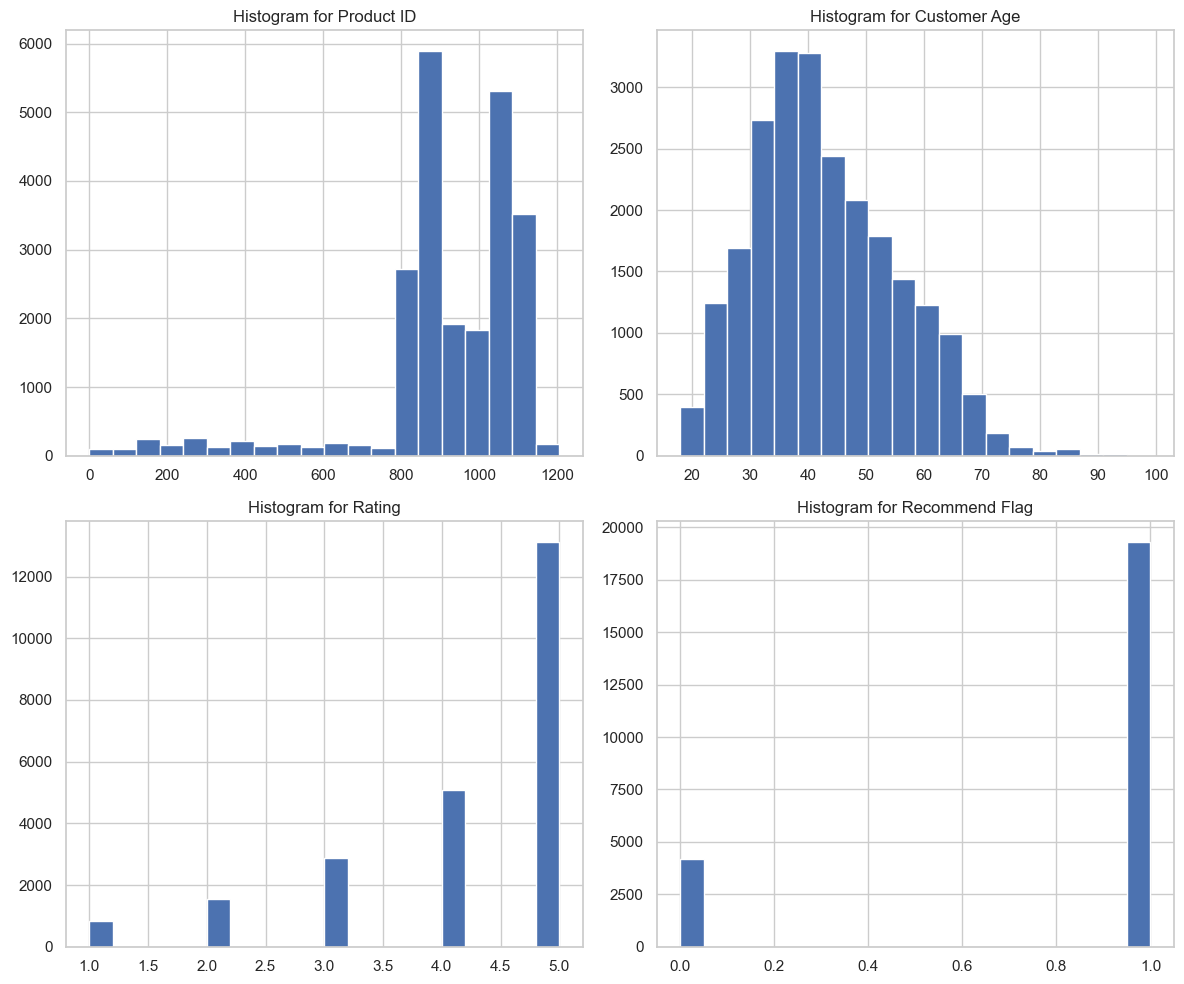

In [7]:
sns.set(style="whitegrid")
numerical_columns = data.select_dtypes(include=['number']).columns

# Calculate the number of subplots needed
num_subplots = len(numerical_columns)

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=num_subplots // 2 + num_subplots % 2, ncols=2, figsize=(12, 5 * (num_subplots // 2 + num_subplots % 2)))

# Loop through numerical columns
for i, column in enumerate(numerical_columns):
    # Calculate the position in the subplot grid
    row = i // 2
    col = i % 2

    # Plot histogram
    axes[row, col].hist(data[column], bins=20)
    axes[row, col].set_title(f"Histogram for {column}")


plt.tight_layout()


plt.show()


#

## Univariate analysis for categorical_columns

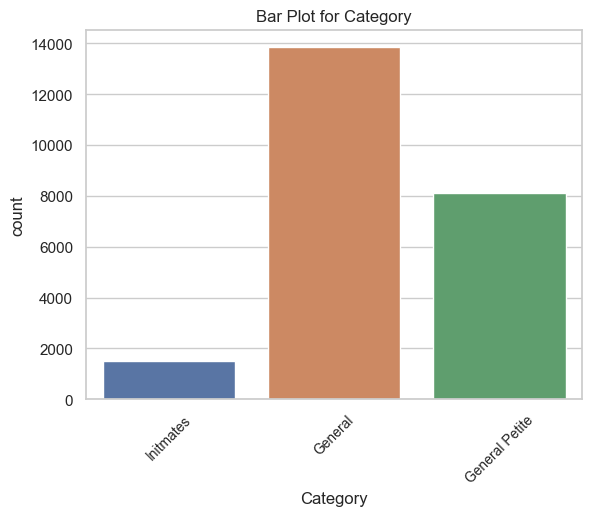

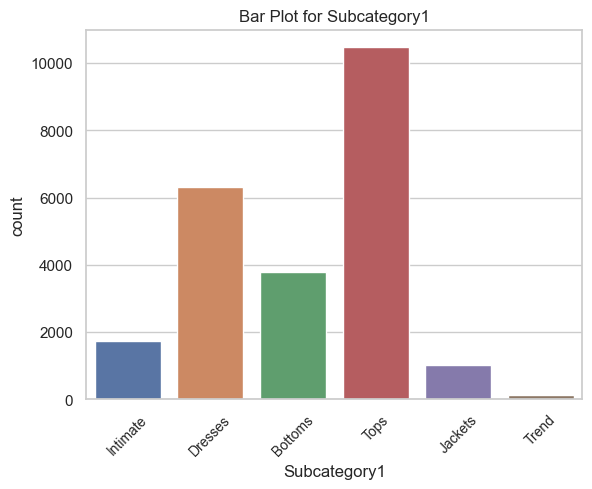

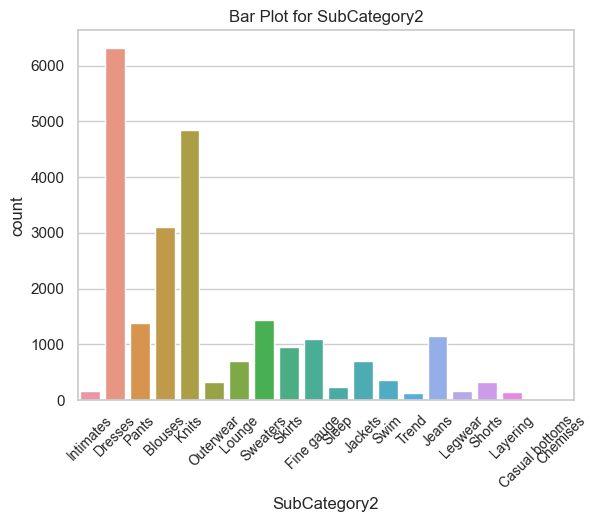

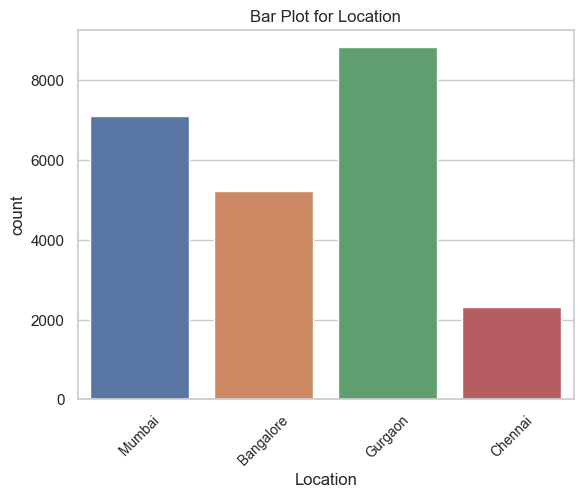

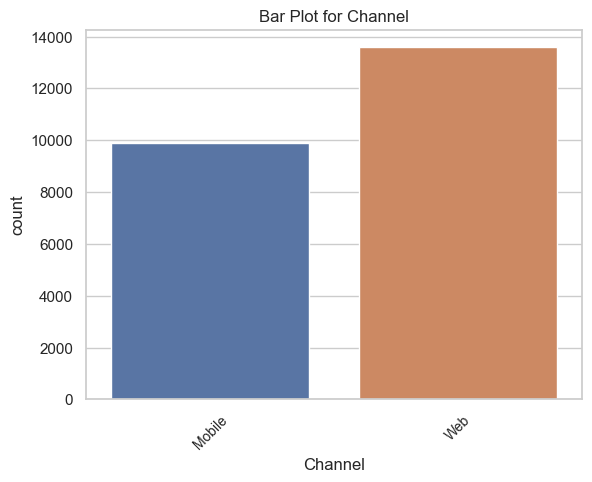

In [8]:
columns_to_include = ['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel']

for i in columns_to_include:
    sns.countplot(x=i, data=data)
    plt.title(f"Bar Plot for {i}")
    plt.xticks(rotation=45, fontsize=10)
    plt.show()


#

# Bi Variate analysis

## Relationship between numeric and categorical variables

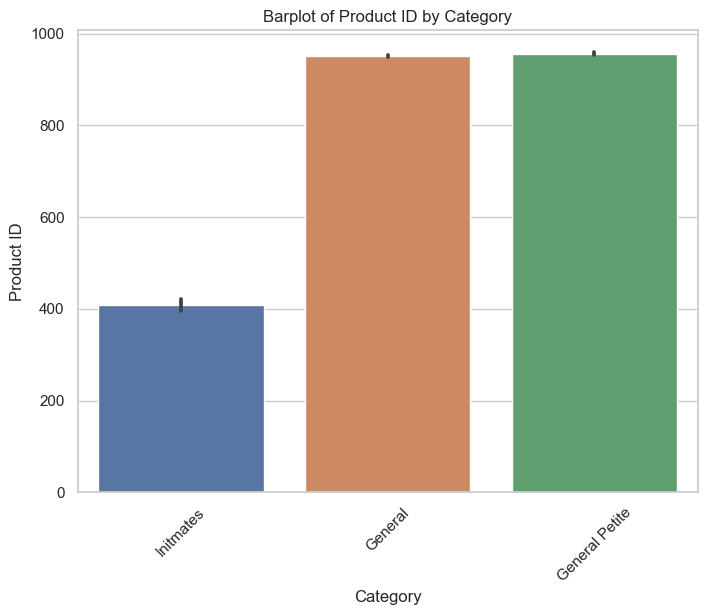

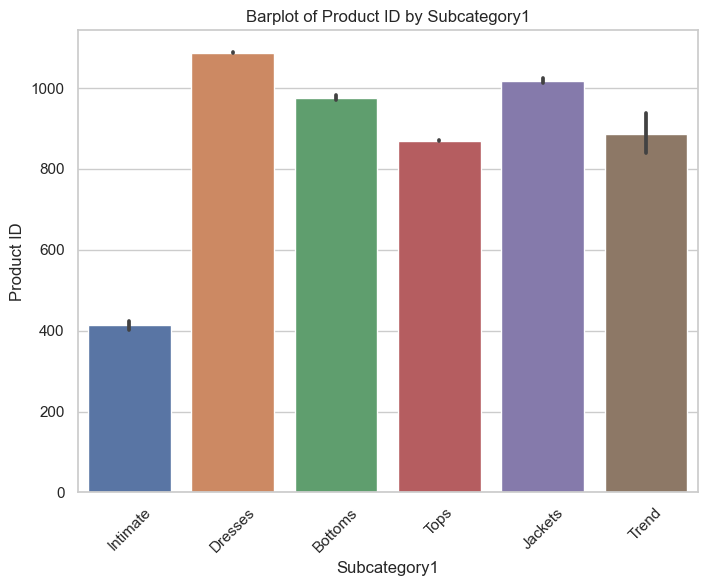

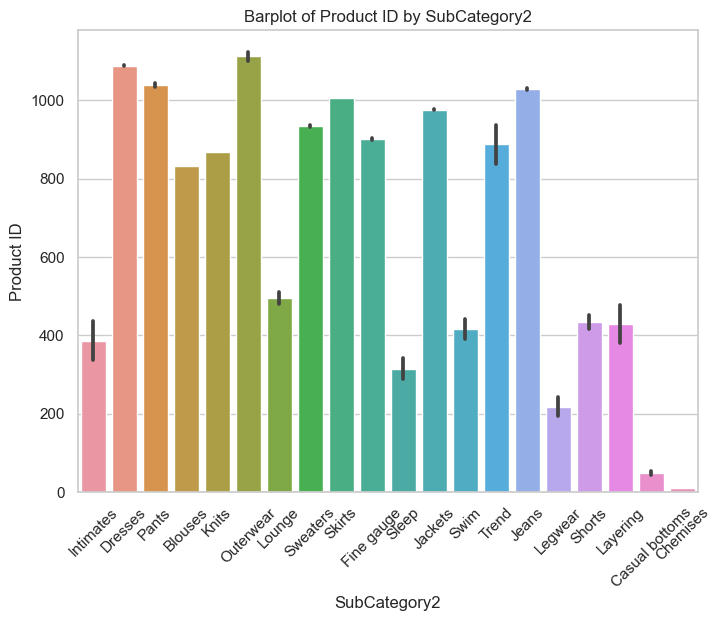

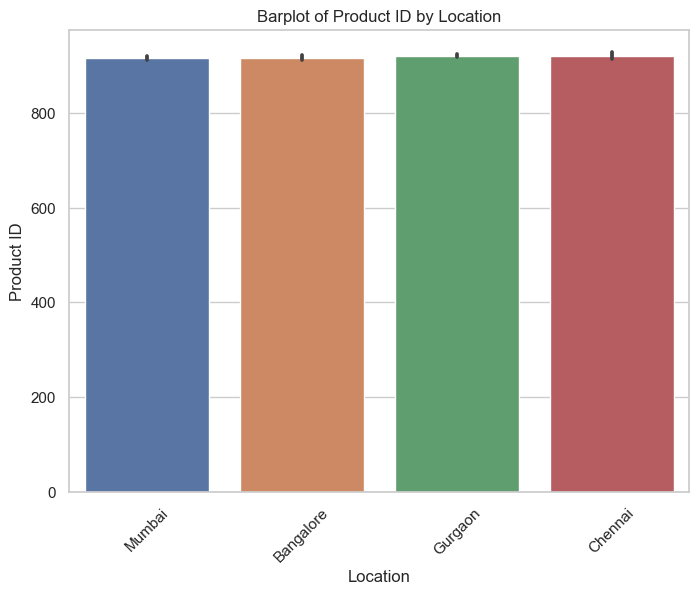

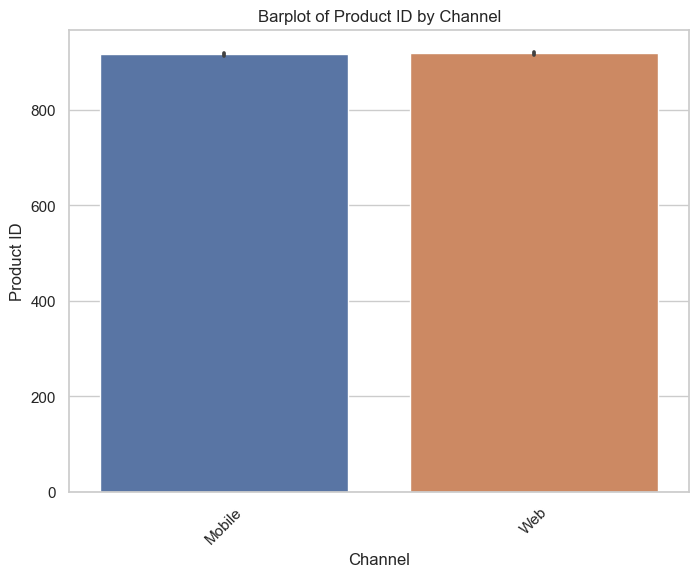

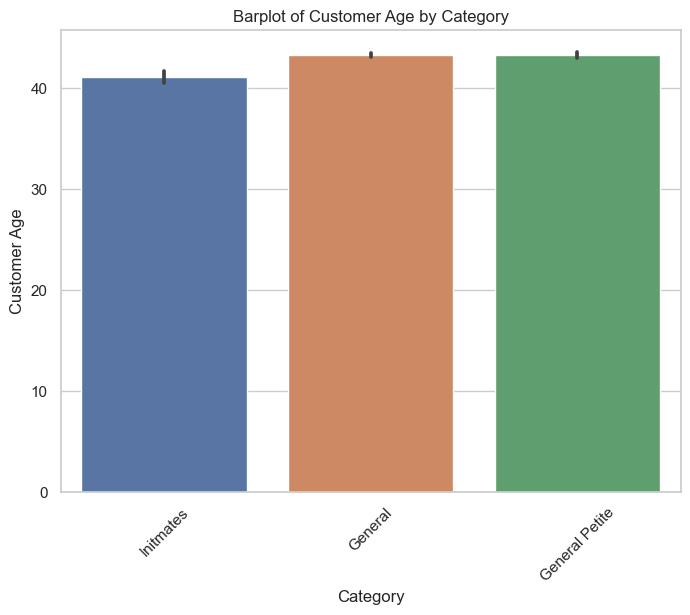

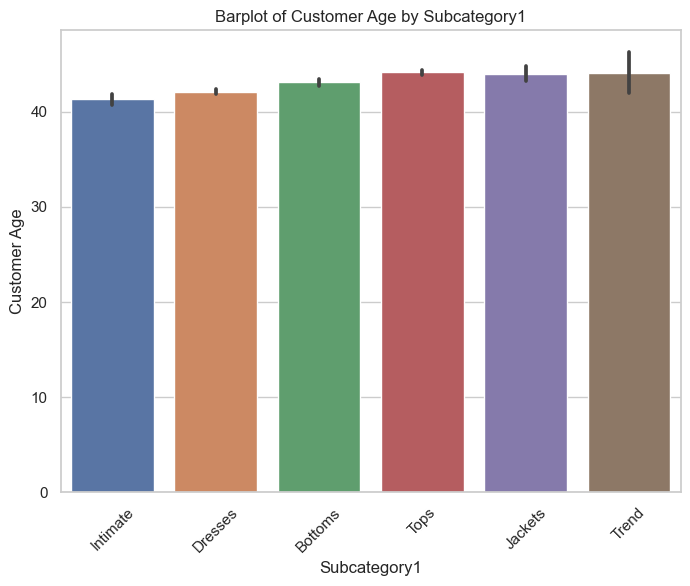

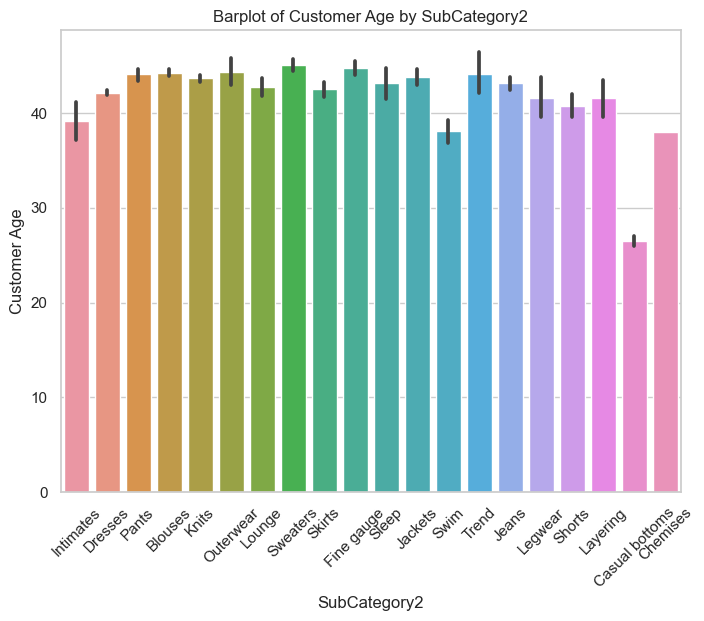

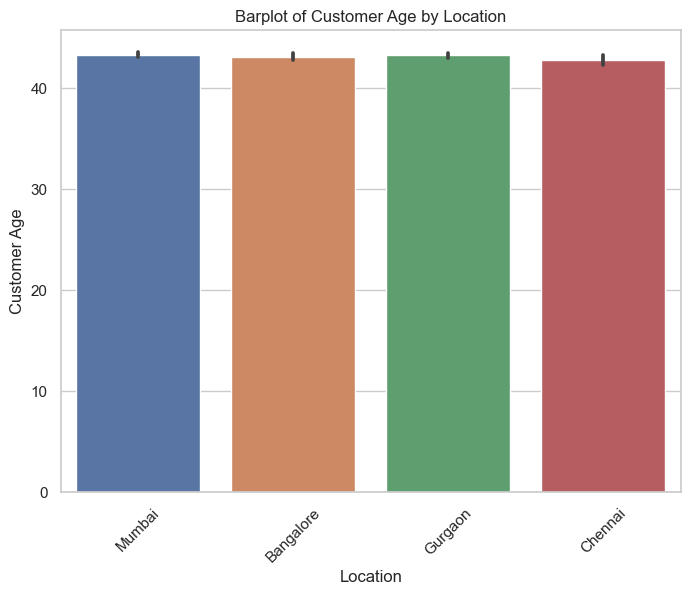

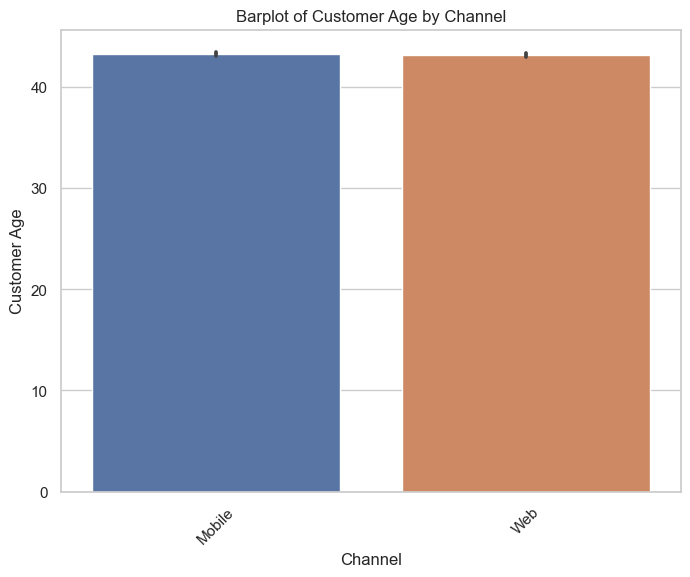

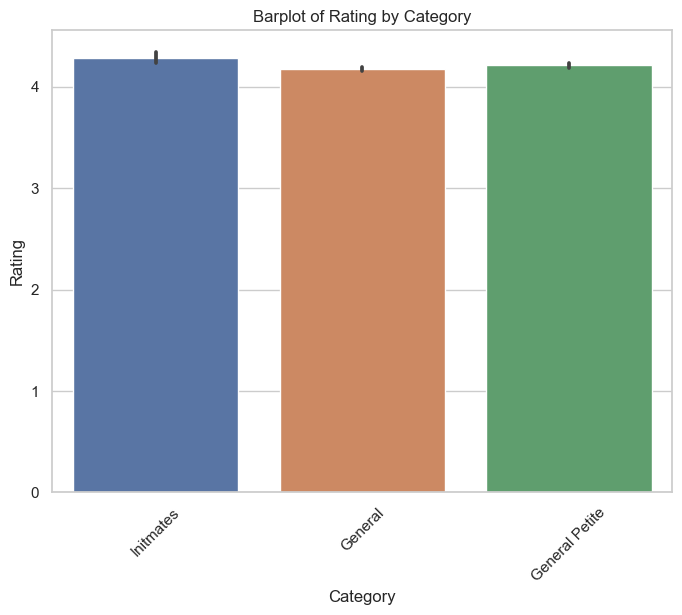

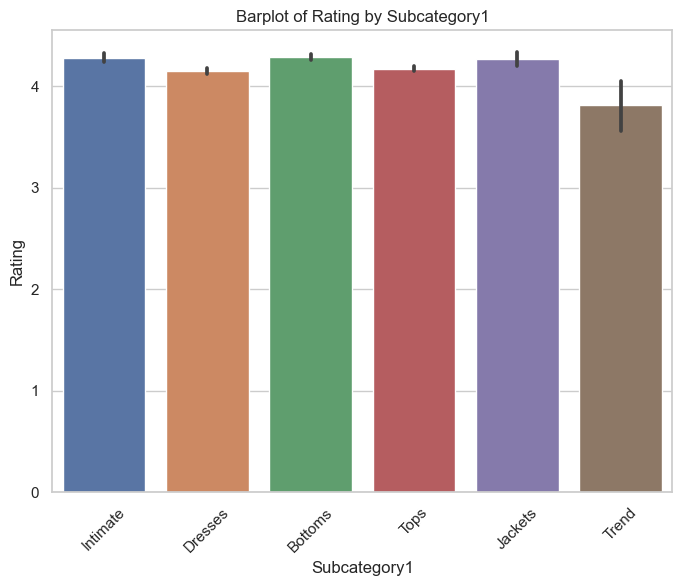

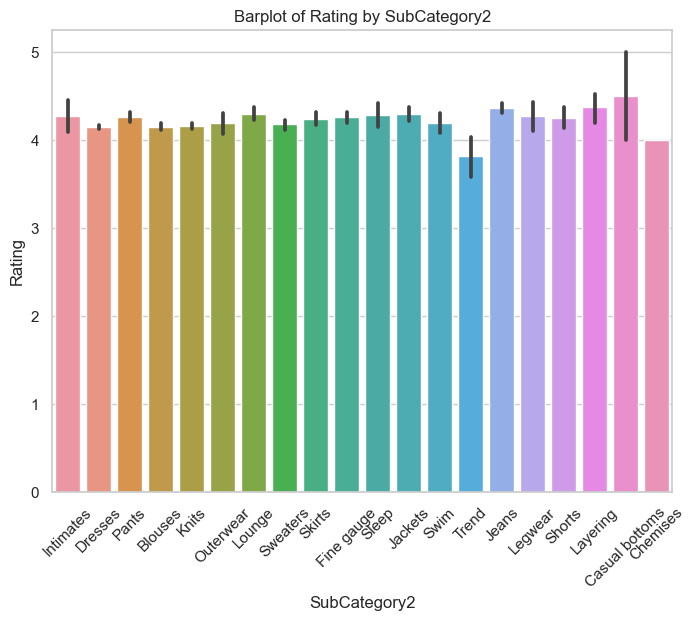

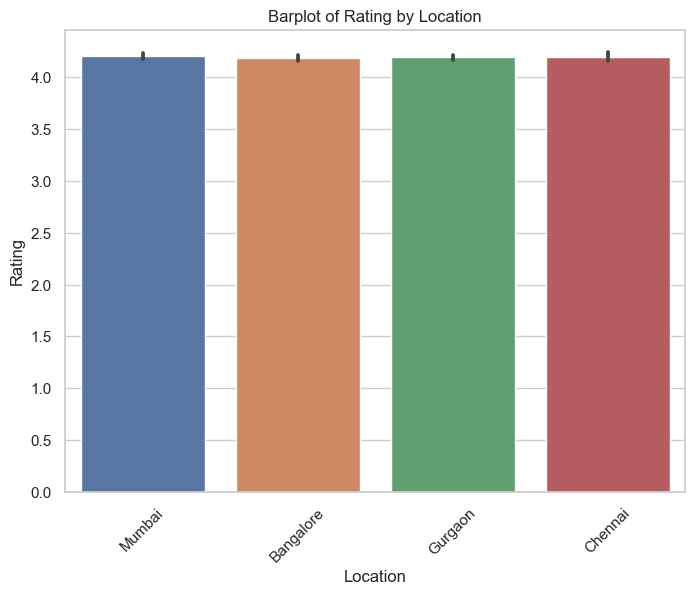

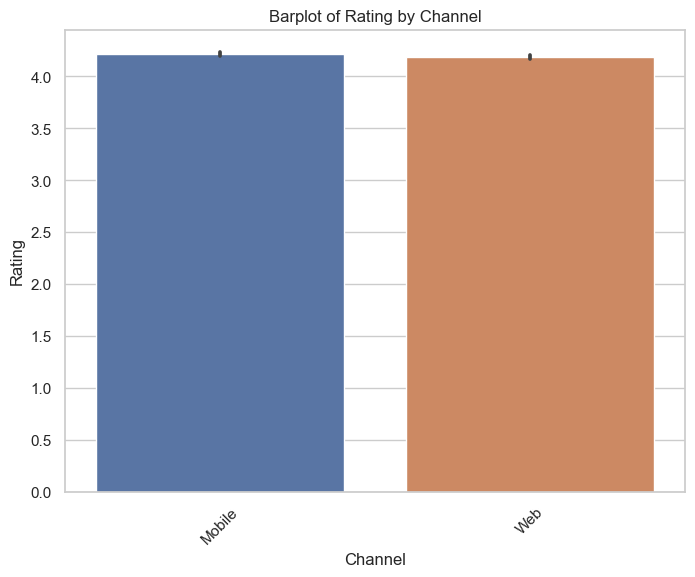

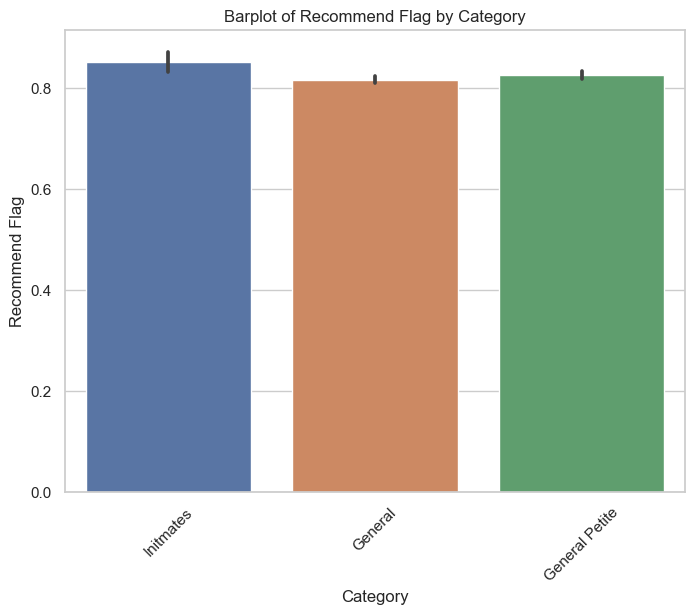

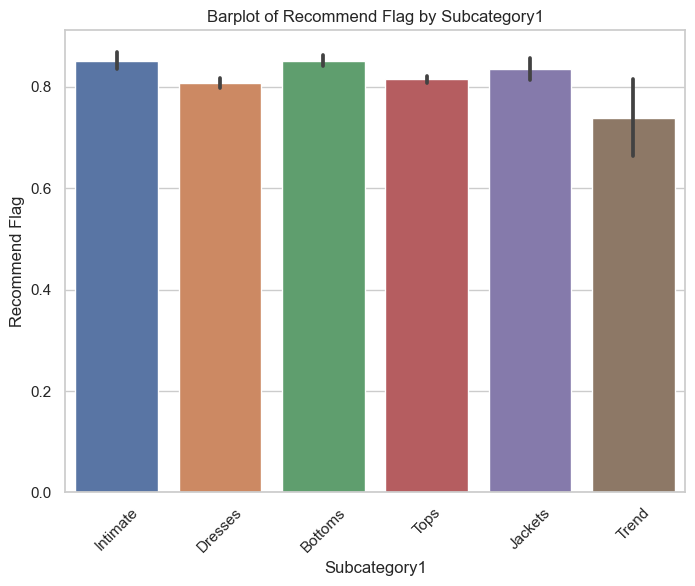

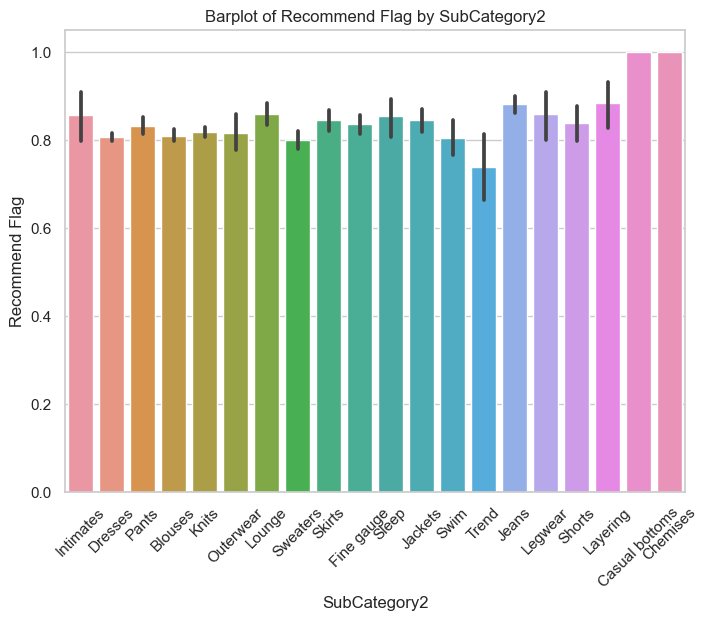

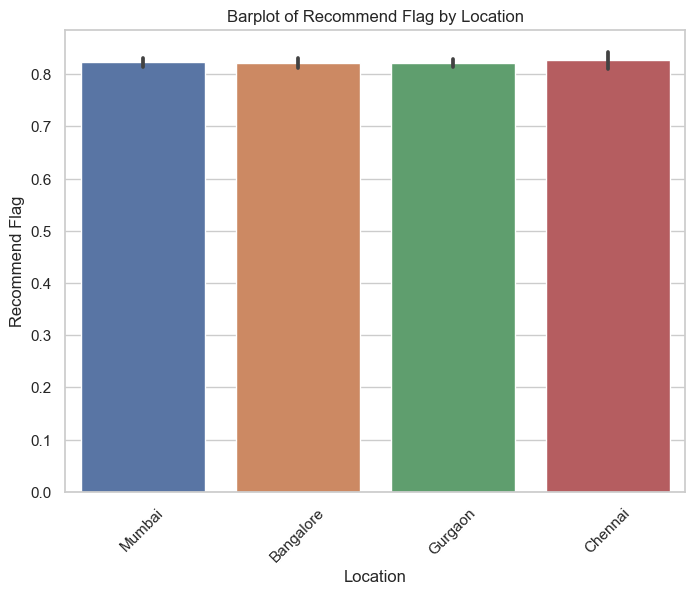

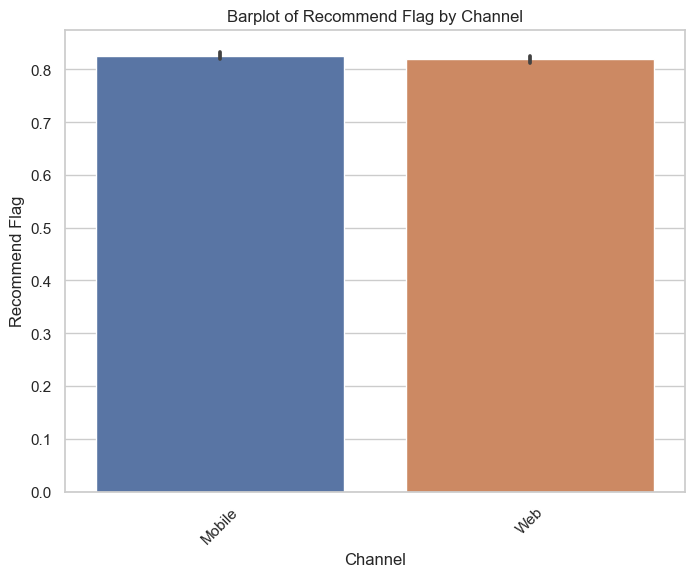

In [9]:
numerical_columns = data.select_dtypes('number').columns
columns_to_include = ['Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel']

for numerical_column in numerical_columns:
    for categorical_column in columns_to_include:
        if numerical_column != categorical_column:
            plt.figure(figsize=(8, 6))
            sns.barplot(x=categorical_column, y=numerical_column, data=data)
            plt.title(f'Barplot of {numerical_column} by {categorical_column}')
            plt.xticks(rotation=45)
            plt.show()

#

## Numeric vs Numeric Relationships

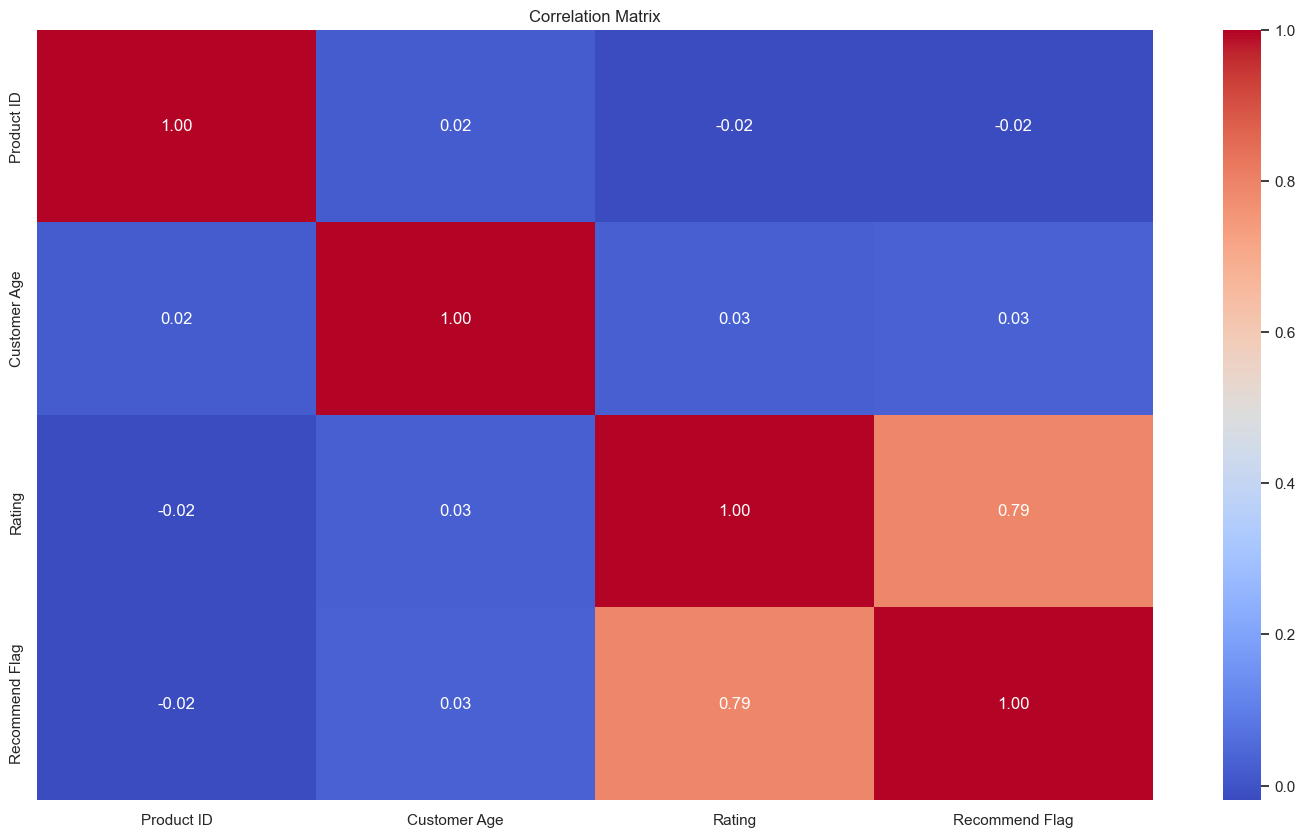

In [10]:
num_old_df=data.select_dtypes(exclude='object').columns
correlation_matrix = data[num_old_df].corr()
plt.figure(figsize=(18, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# 

## categorical variables vs categorical variables

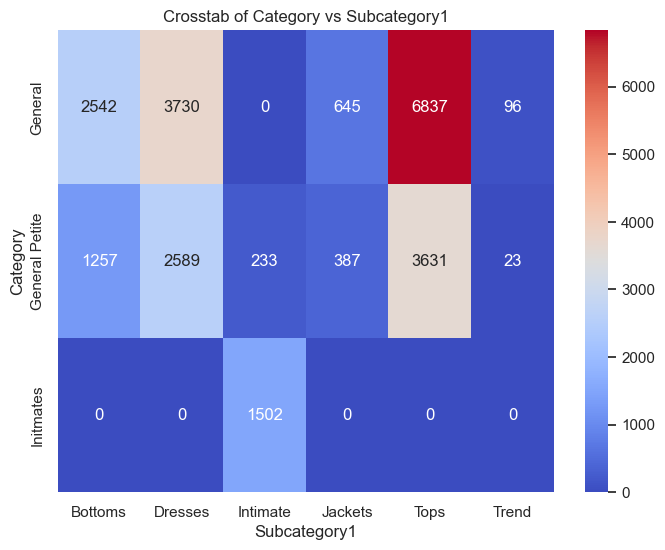

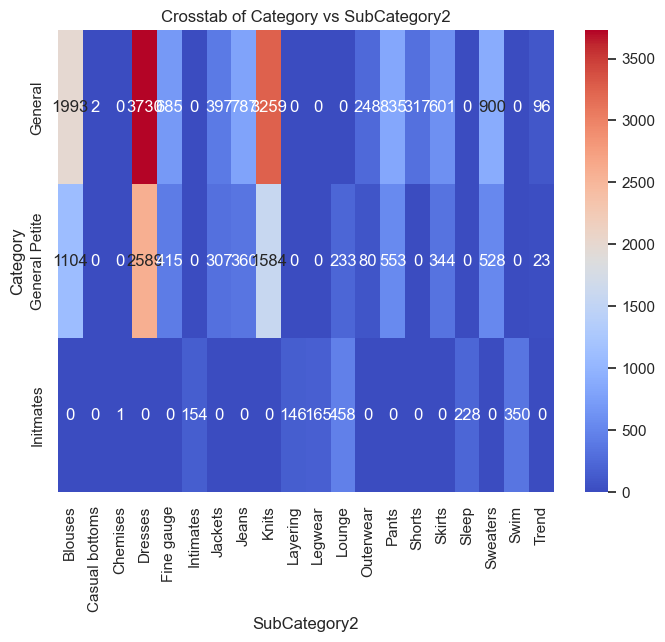

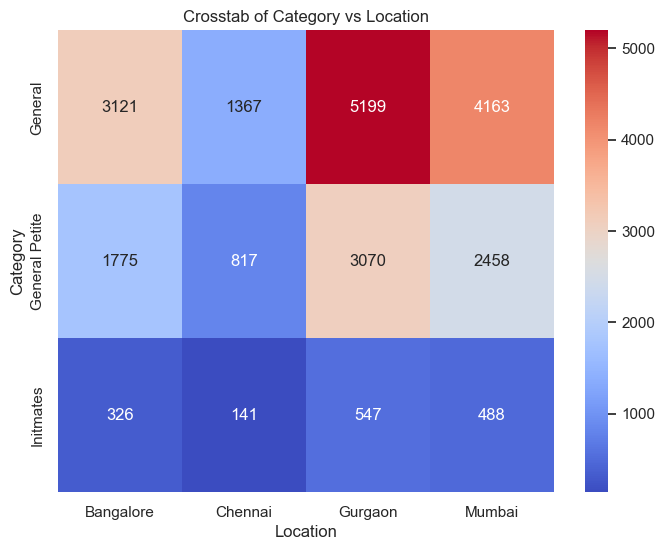

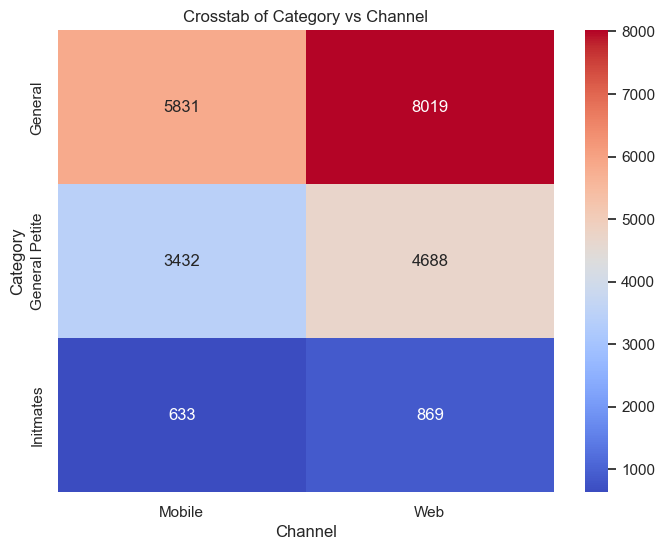

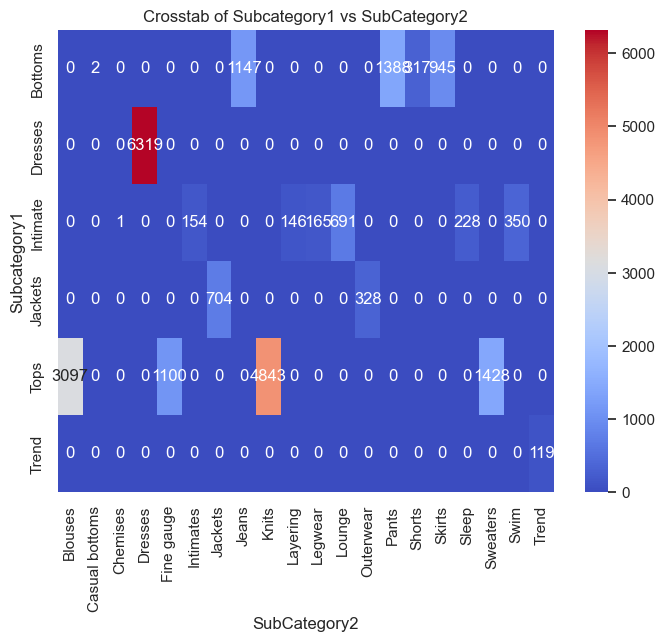

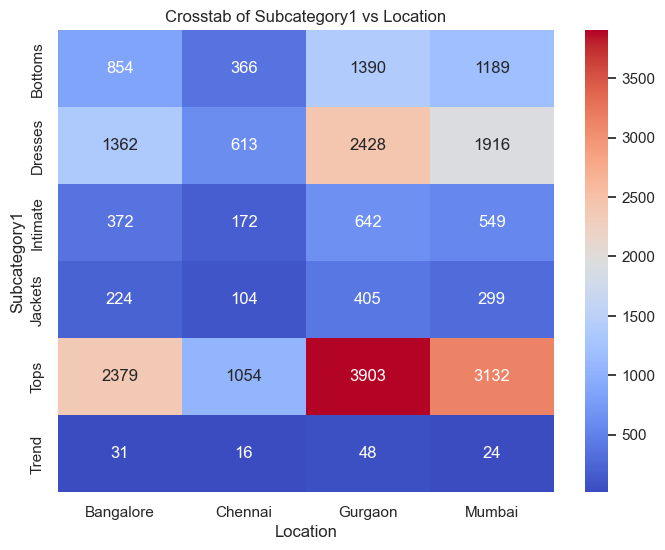

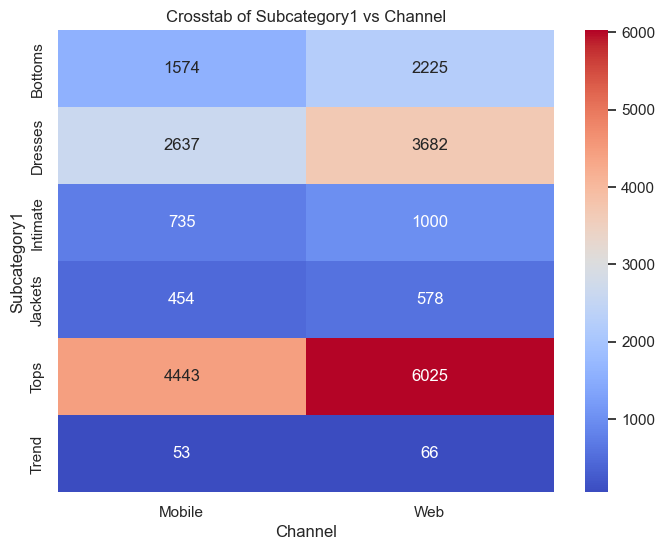

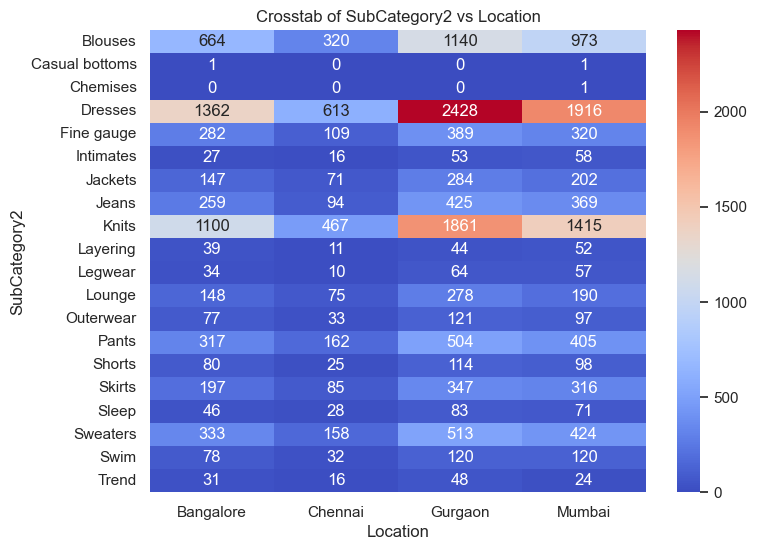

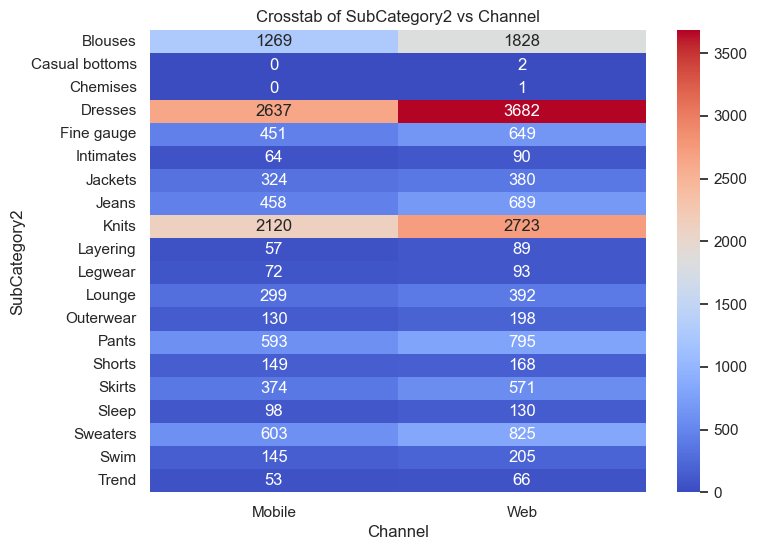

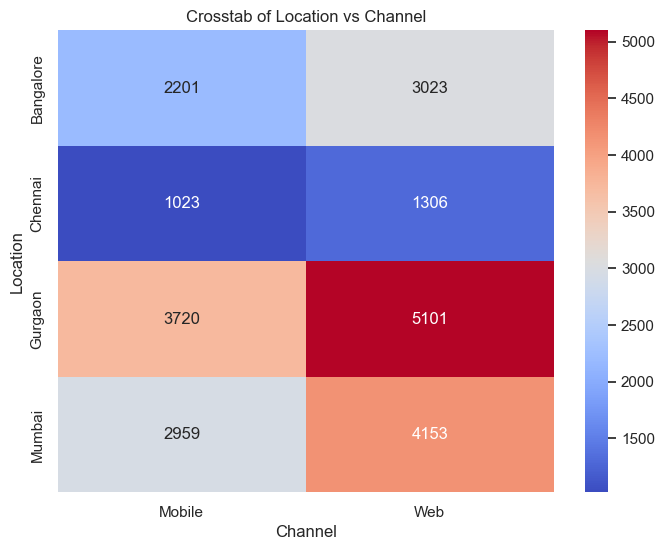

In [11]:
plotted_combinations = set()

for i in columns_to_include:
    for j in columns_to_include:
        # Check if the combination has been plotted before in either order
        if (i, j) not in plotted_combinations and (j, i) not in plotted_combinations and i != j:
            crosstab_table = pd.crosstab(obj_df[i], obj_df[j])
            
            plt.figure(figsize=(8, 6))
            sns.heatmap(crosstab_table, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f'Crosstab of {i} vs {j}')
            plt.show()
            
            # Add the combination to the set
            plotted_combinations.add((i, j))

#

In [12]:
#Checking Missing Values
data.isnull().sum().sum()

4697

In [13]:
#Removing missing values
data.dropna(inplace=True)

In [14]:
# Remove duplicates
data.drop_duplicates(inplace=True)

#

# Text Mining

In [15]:
# Combined review title and text
data['Combined Review'] = data['Review Title'].fillna('') + ' ' + data['Review Text'].fillna('')

In [16]:
# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [17]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())      # Tokenization and convert to lowercase
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

In [18]:
data['Cleaned Review'] = data['Combined Review'].apply(preprocess_text)

In [19]:
data

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,Combined Review,Cleaned Review
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Some major design flaws I had such high hopes ...,major design flaw high hope dress really wante...
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,"My favorite buy! I love, love, love this jumps...",favorite buy love love love jumpsuit fun flirt...
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Flattering shirt This shirt is very flattering...,flattering shirt shirt flattering due adjustab...
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,Not for the very petite I love tracy reese dre...,petite love tracy reese dress one petite foot ...
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun aded basket hte last mint...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,General Petite,Dresses,Dresses,Gurgaon,Mobile,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,Great dress for many occasions I was very happ...,great dress many occasion happy snag dress gre...
23482,862,General Petite,Tops,Knits,Gurgaon,Web,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,Wish it was made of cotton It reminds me of ma...,wish made cotton reminds maternity clothes sof...
23483,1104,General Petite,Dresses,Dresses,Gurgaon,Web,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,"Cute, but see through This fit well, but the t...",cute see fit well top see never would worked g...
23484,1084,General,Dresses,Dresses,Gurgaon,Web,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,"Very cute dress, perfect for summer parties an...",cute dress perfect summer party bought dress w...


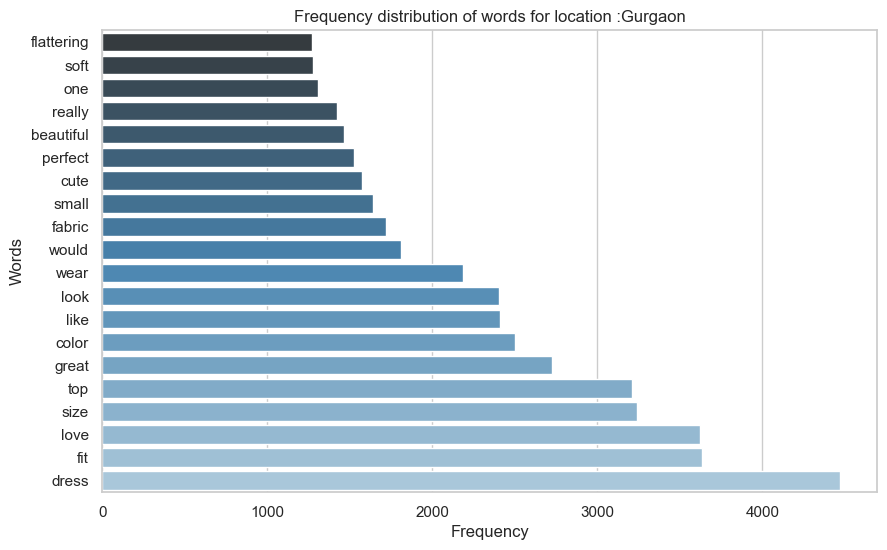

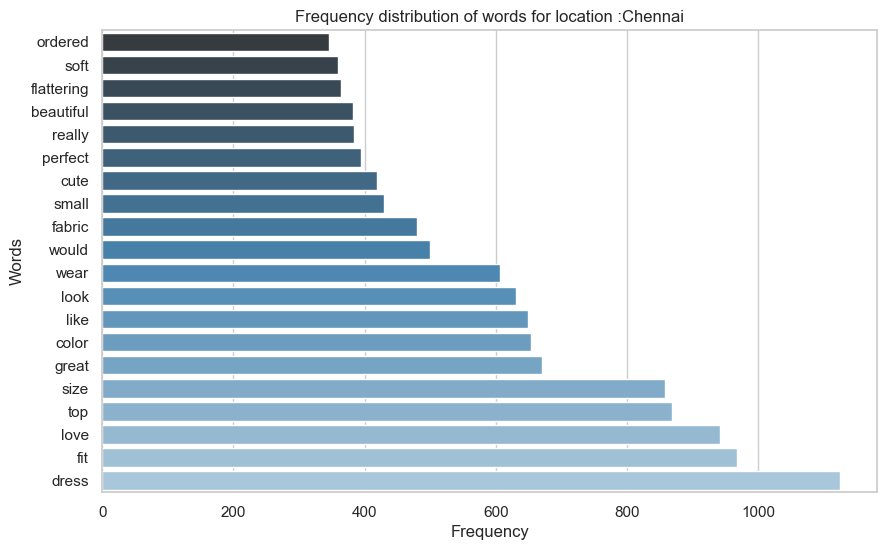

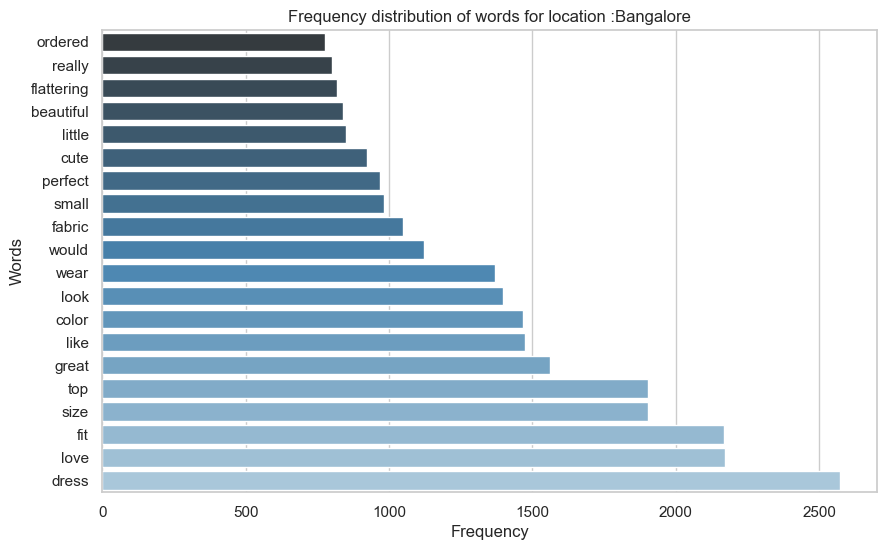

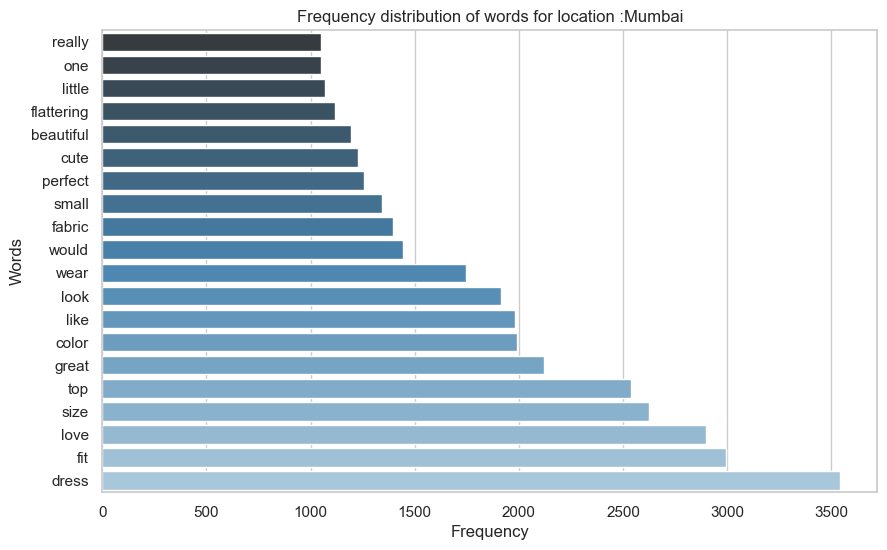

In [20]:
for i in data['Location'].unique():
    ab=data.loc[data['Location']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data_1 = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data_1]
    frequencies = [item[1] for item in data_1]
 # Create a DataFrame for the top words and frequencies
    word_freq_df = pd.DataFrame({'Words': words, 'Frequencies': frequencies})
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequencies', y='Words', data=word_freq_df, palette='Blues_d')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for location :{i}")
    plt.gca().invert_yaxis()  
    plt.show()

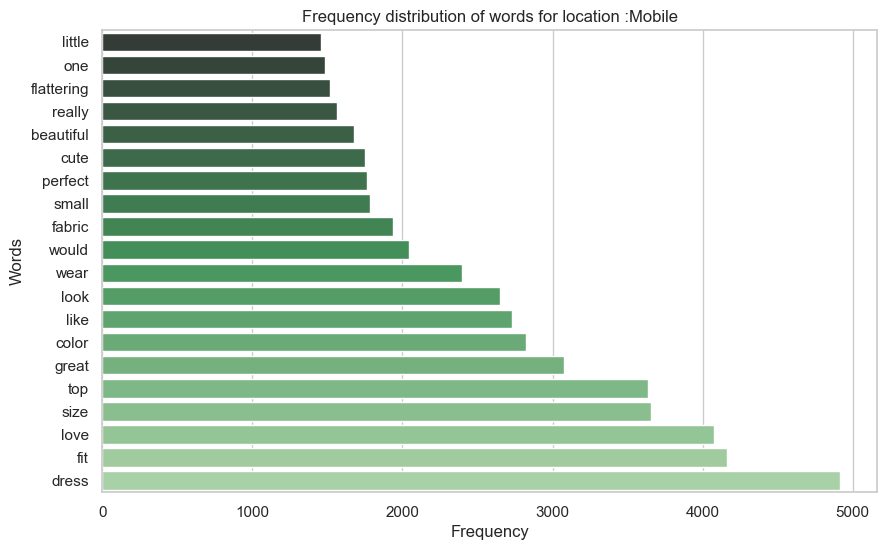

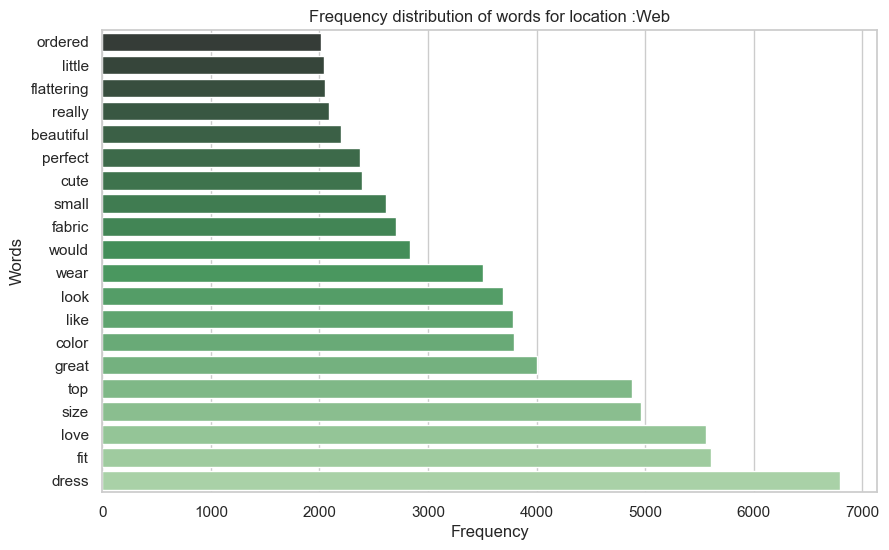

In [24]:
for i in data['Channel'].unique():
    ab=data.loc[data['Channel']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data_1 = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data_1]
    frequencies = [item[1] for item in data_1]
 # Create a DataFrame for the top words and frequencies
    word_freq_df = pd.DataFrame({'Words': words, 'Frequencies': frequencies})
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequencies', y='Words', data=word_freq_df, palette='Greens_d')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for location :{i}")
    plt.gca().invert_yaxis()  
    plt.show()

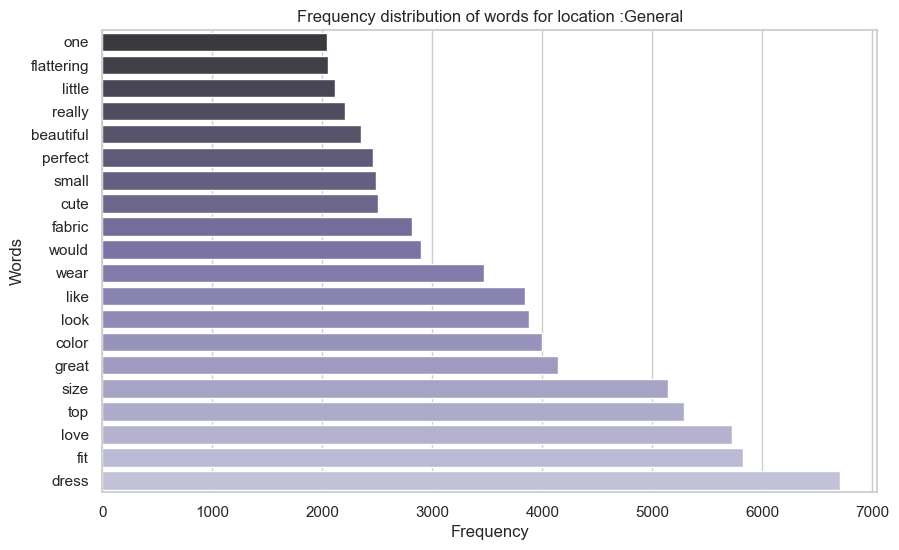

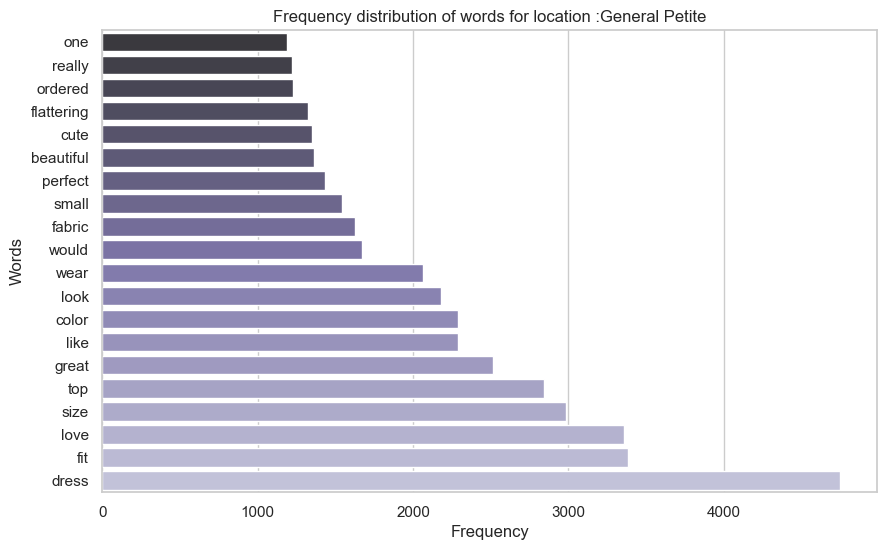

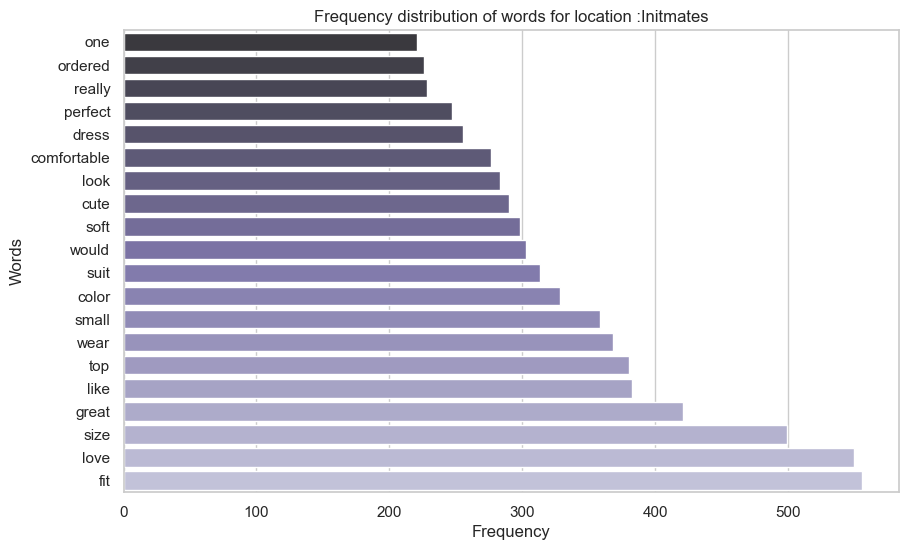

In [25]:
for i in data['Category'].unique():
    ab=data.loc[data['Category']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data_1 = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data_1]
    frequencies = [item[1] for item in data_1]
 # Create a DataFrame for the top words and frequencies
    word_freq_df = pd.DataFrame({'Words': words, 'Frequencies': frequencies})
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequencies', y='Words', data=word_freq_df, palette='Purples_d')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for location :{i}")
    plt.gca().invert_yaxis()  
    plt.show()

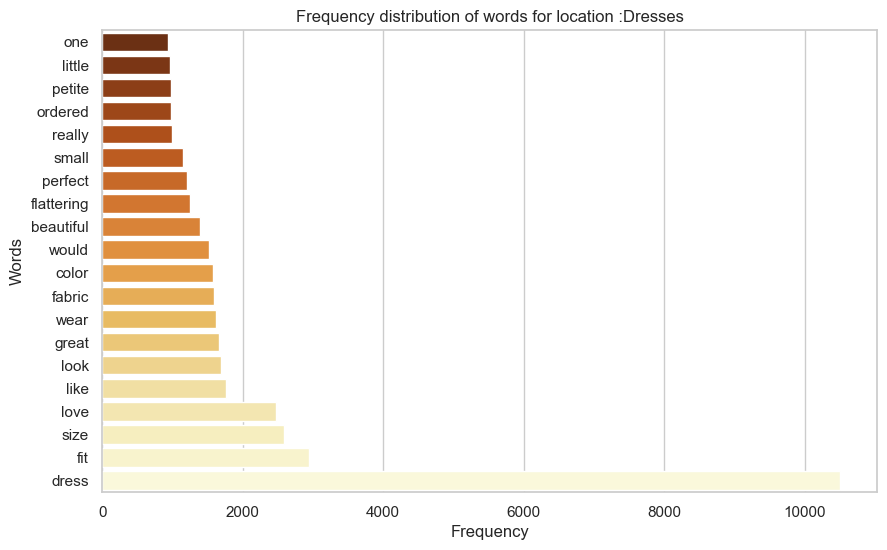

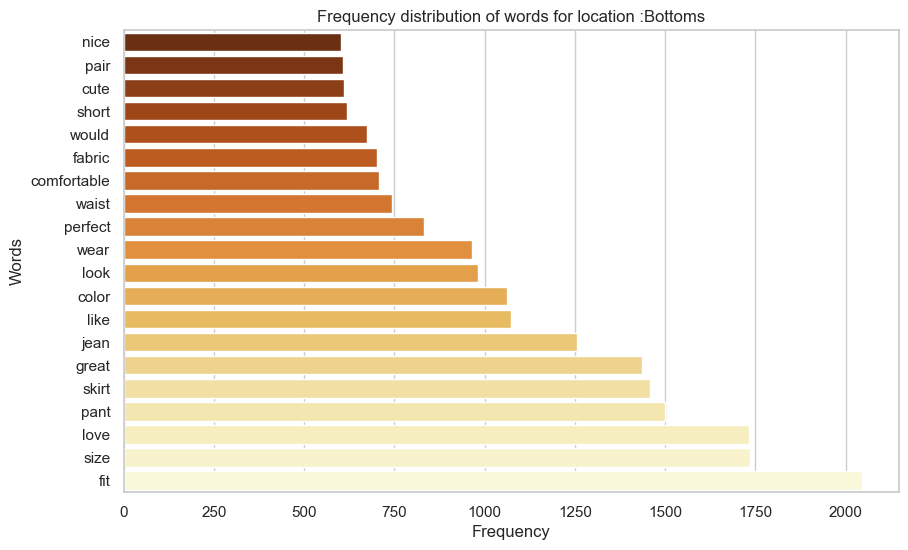

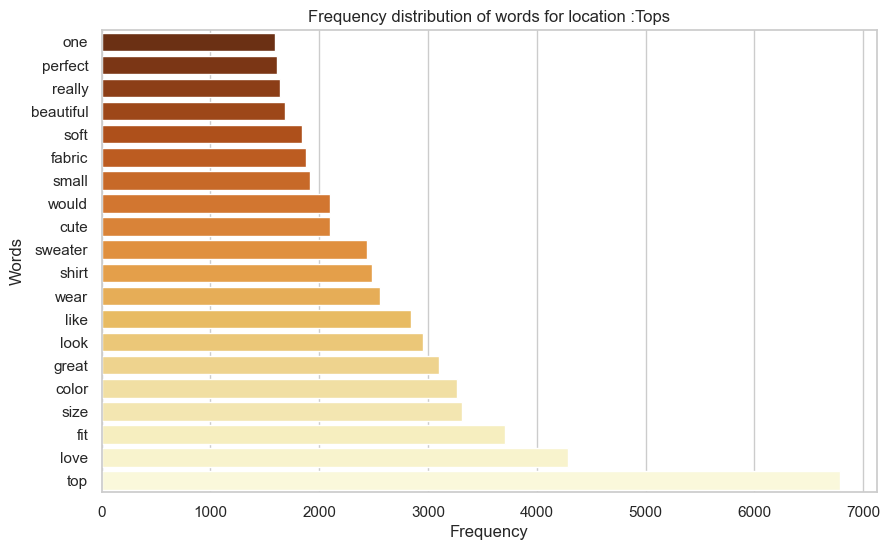

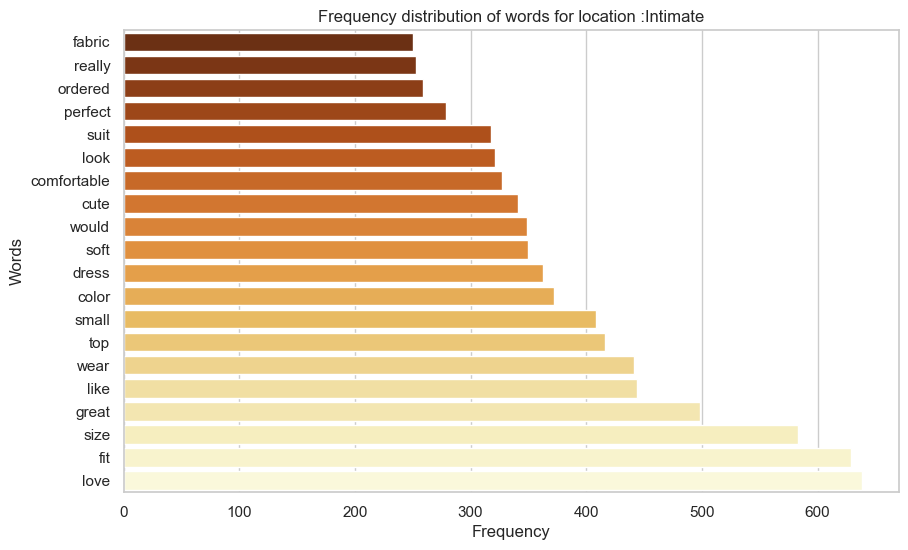

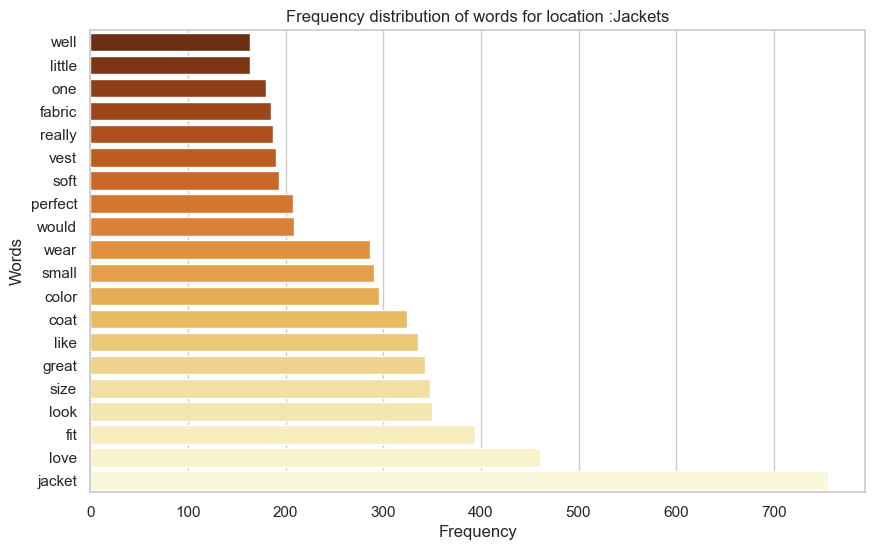

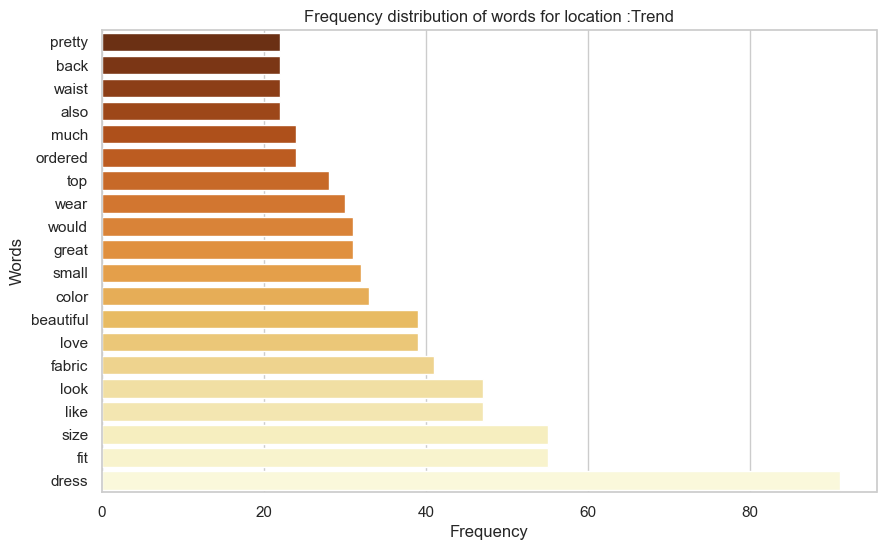

In [26]:
for i in data['Subcategory1'].unique():
    ab=data.loc[data['Subcategory1']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data_1 = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data_1]
    frequencies = [item[1] for item in data_1]
 # Create a DataFrame for the top words and frequencies
    word_freq_df = pd.DataFrame({'Words': words, 'Frequencies': frequencies})
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequencies', y='Words', data=word_freq_df, palette='YlOrBr')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for location :{i}")
    plt.gca().invert_yaxis()  
    plt.show()

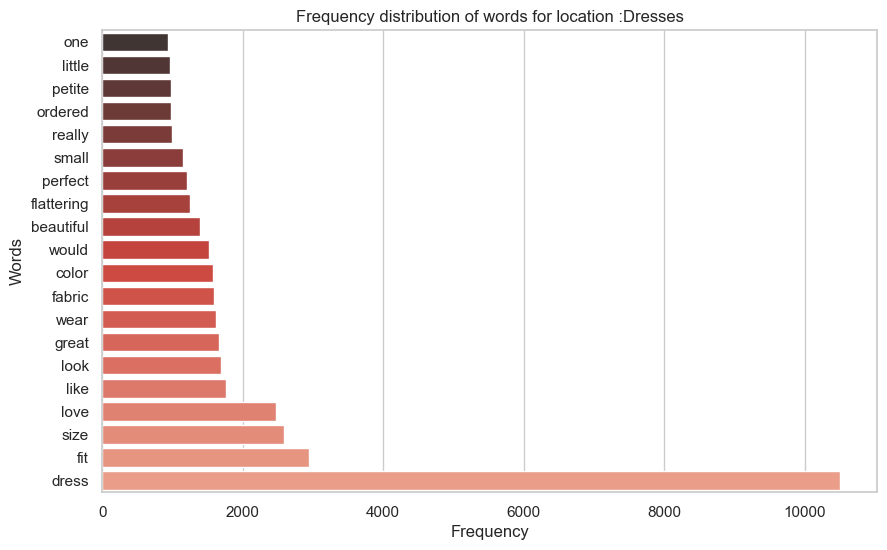

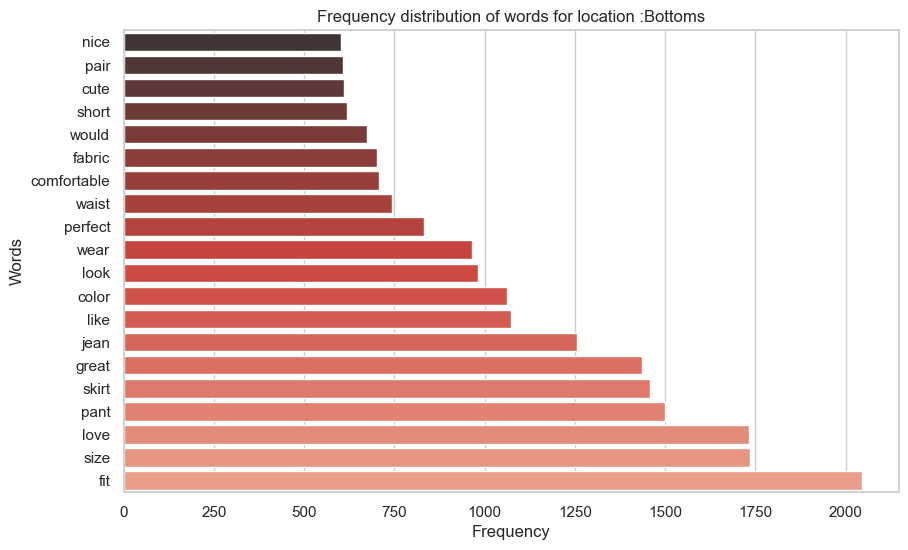

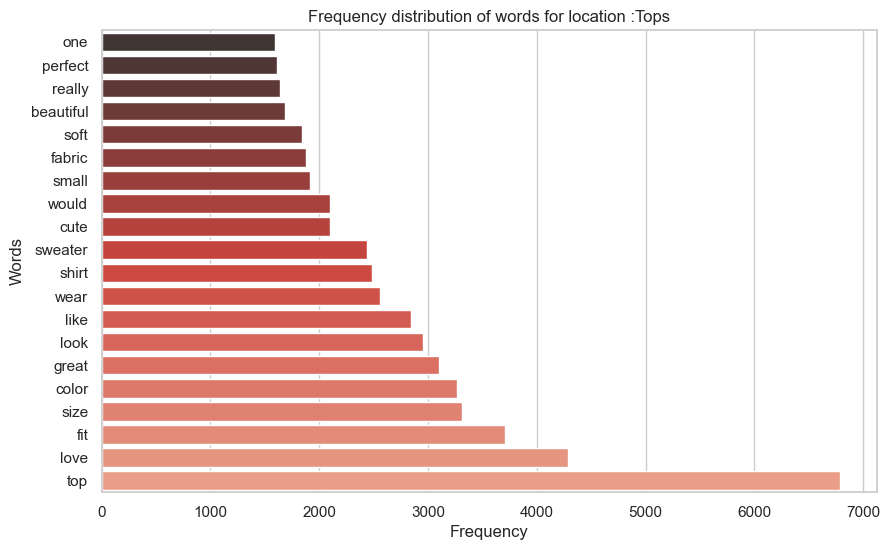

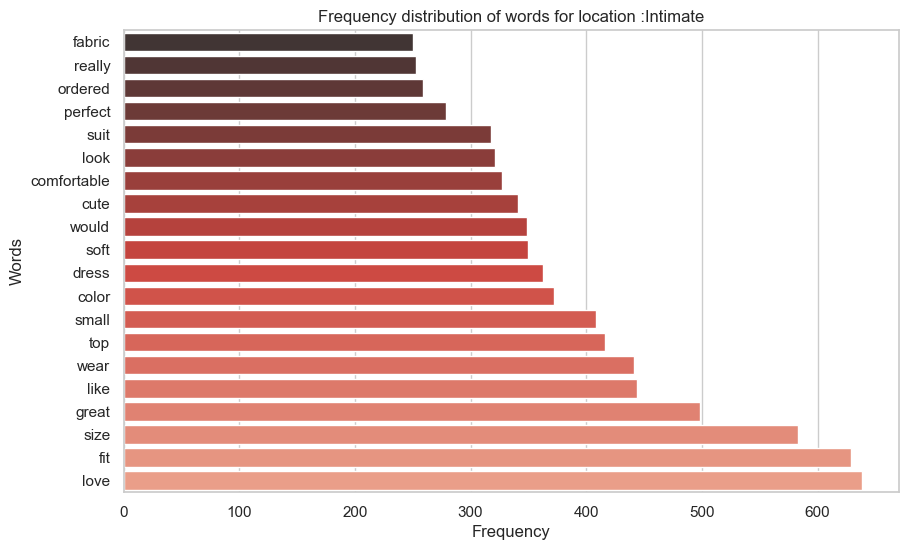

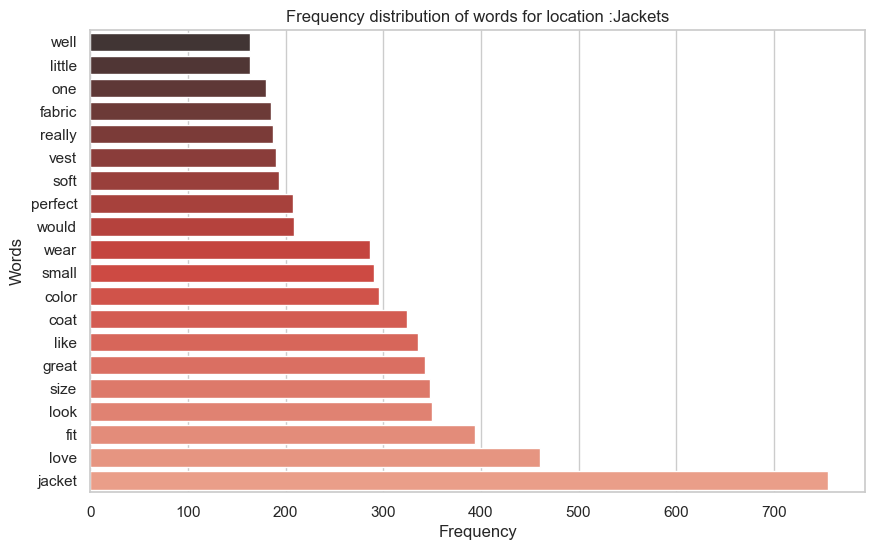

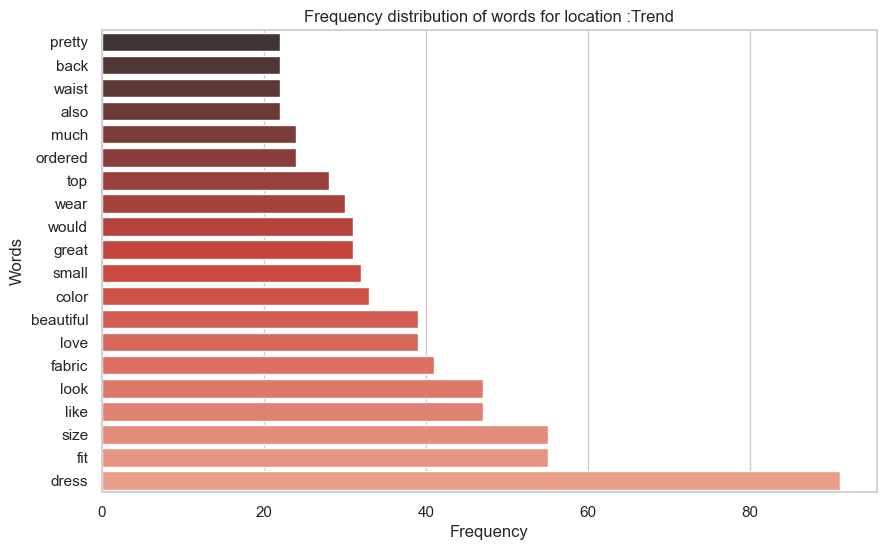

In [28]:
for i in data['Subcategory1'].unique():
    ab=data.loc[data['Subcategory1']==i]
    text = " ".join(ab["Cleaned Review"].values)
    freq_distribution = FreqDist(word_tokenize(text))
    data_1 = freq_distribution.most_common()[0:20]
    words = [item[0] for item in data_1]
    frequencies = [item[1] for item in data_1]
 # Create a DataFrame for the top words and frequencies
    word_freq_df = pd.DataFrame({'Words': words, 'Frequencies': frequencies})
    
    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequencies', y='Words', data=word_freq_df, palette='Reds_d')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f"Frequency distribution of words for location :{i}")
    plt.gca().invert_yaxis()  
    plt.show()

In [23]:
data.keys()

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'Combined Review', 'Cleaned Review'],
      dtype='object')

#

## Sentiment Analysis

In [29]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mailm\AppData\Roaming\nltk_data...


True

In [39]:
sid = SentimentIntensityAnalyzer()

In [40]:
def sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.2:
        return 'Positive'
    elif scores['compound'] <= -0.2:
        return 'Negative'
    else:
        return 'Neutral'

In [41]:
data['Sentiment'] = data['Cleaned Review'].apply(sentiment)

# Sentiment analysis by channel

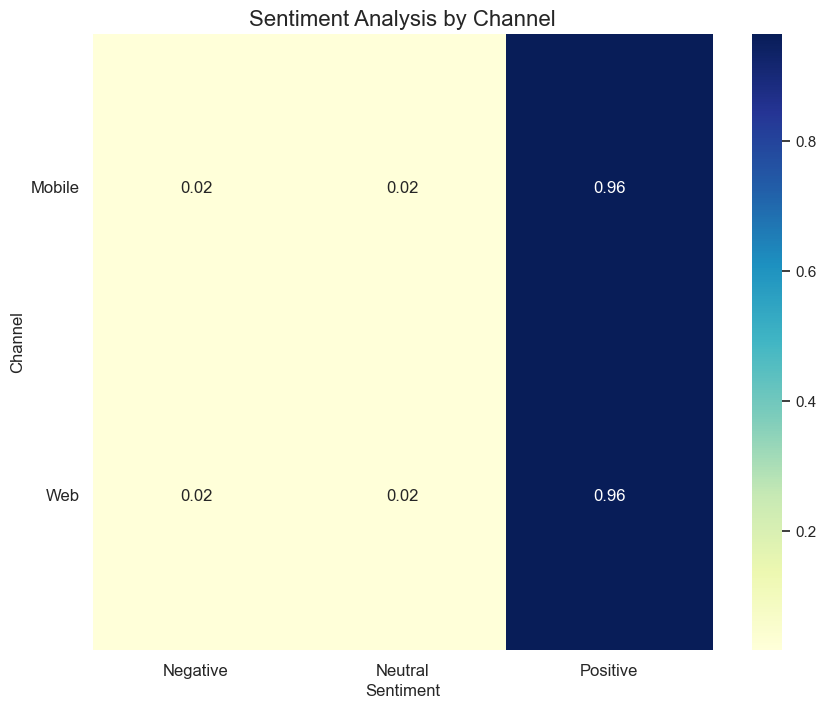

In [44]:
channel_sentiment = data.groupby('Channel')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
plt.figure(figsize=(10, 8))
sns.heatmap(channel_sentiment, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Sentiment Analysis by Channel', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The sentiment data indicates that the Mobile and Web channels predominantly convey positive sentiments, with a smaller proportion of negative and neutral sentiments. This suggests that customers generally perceive or experience the product or service positively across both channels

# Sentiment analysis by category

In [46]:
category_sentiment = data.groupby('Category')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)

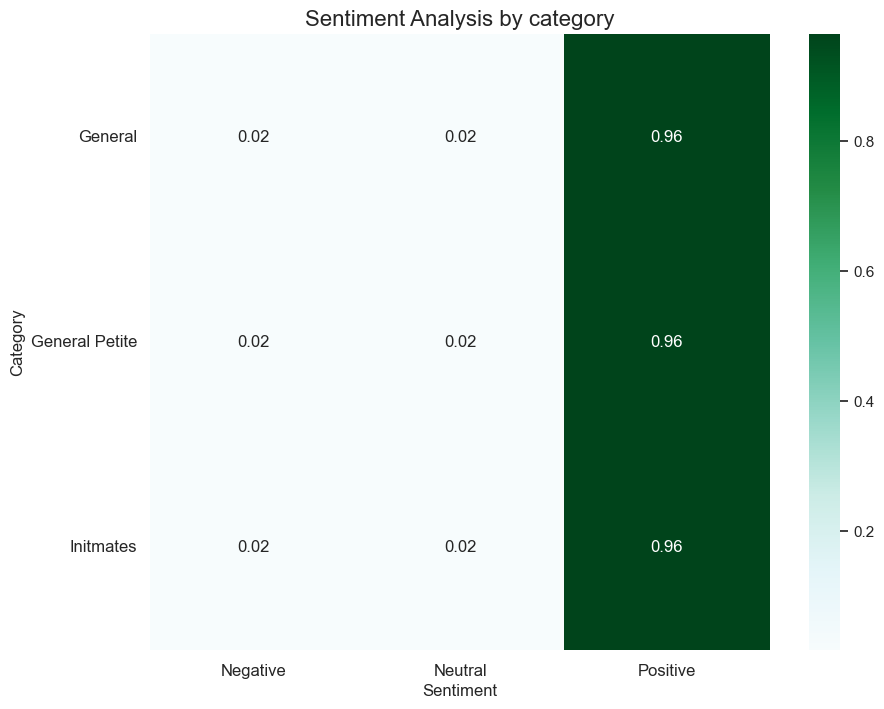

In [48]:
plt.figure(figsize=(10, 8))
sns.heatmap(category_sentiment, annot=True, cmap='BuGn', fmt=".2f")
plt.title('Sentiment Analysis by category', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The sentiment data indicates that across all categories (General, General Petite, and Intimates), positive sentiments prevail. Negative sentiments are relatively scarce in all categories, while neutral sentiments fall between the positive and negative ones. This suggests a generally positive sentiment towards the products or services within these categories

# Sentiment analysis by location

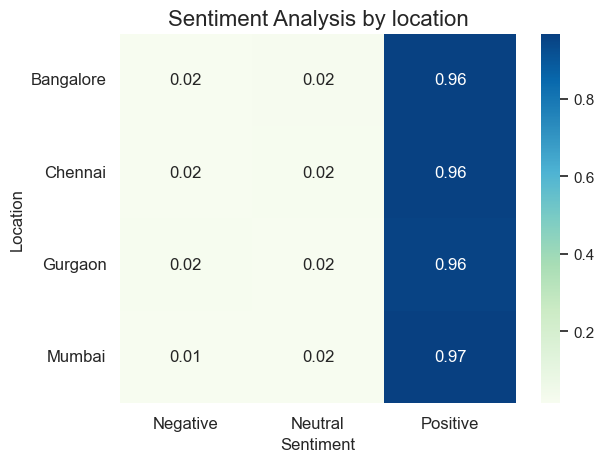

In [50]:
location_sentiment = data.groupby('Location')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(location_sentiment, annot=True, cmap='GnBu', fmt=".2f")
plt.title('Sentiment Analysis by location', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Overall, the sentiment data suggests that across all locations (Bangalore, Chennai, Gurgaon, and Mumbai), there is a predominant expression of positive sentiments. Negative sentiments are relatively low in all locations, while neutral sentiments fall between positive and negative expressions. This could imply that the sentiment towards the subject being analyzed (such as a product, service, or experience) is generally positive across these cities

# Sentiment analysis by subcategory1

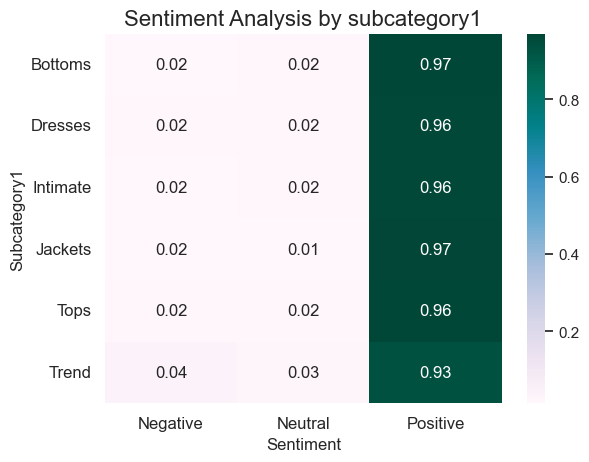

In [51]:
subcategory1_sentiment = data.groupby('Subcategory1')['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(subcategory1_sentiment, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('Sentiment Analysis by subcategory1', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

the sentiment data suggests that across most subcategories, there is a predominant expression of positive sentiments. Negative sentiments are generally low across all subcategories, with some variations. The "Trend" subcategory stands out with a slightly different sentiment distribution, showing a relatively lower positive sentiment and higher negative and neutral sentiments compared to other subcategories. This could imply differences in customer perceptions or experiences within each subcategory

# Sentiment analysis by age group

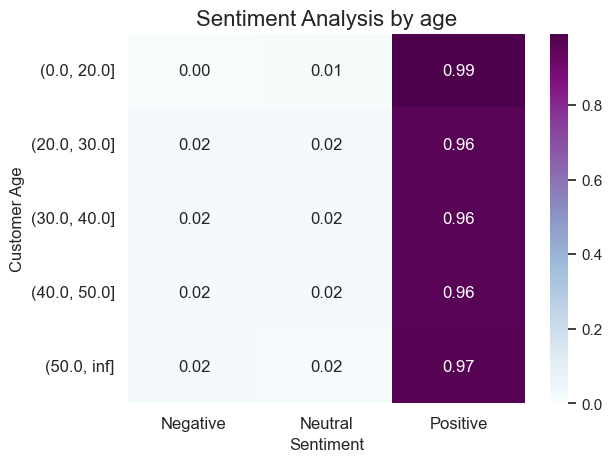

In [53]:
age_sentiment = data.groupby(pd.cut(data['Customer Age'], bins=[0, 20, 30, 40, 50, float('inf')]))['Sentiment'].value_counts(normalize=True).unstack().fillna(0)
sns.heatmap(age_sentiment, annot=True, cmap='BuPu', fmt=".2f")
plt.title('Sentiment Analysis by age', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

the sentiment data suggests that across different customer age groups, there is a predominant expression of positive sentiments. Negative sentiments are generally low across all age groups, with some variations. The youngest age group (0 to 20 years) stands out with an overwhelmingly positive sentiment, while the older age groups also show a strong positive sentiment but with slightly higher proportions of negative and neutral sentiments compared to the youngest age group

#

# predictive analysis

## predicting which customers are recommending

In [54]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(data['Cleaned Review'])
y = data['Recommend Flag']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Accuracy Train:: ",accuracy_score(pred_train,y_train))
print("Accuracy Test:: ",accuracy_score(pred_test,y_test))

Accuracy Train::  1.0
Accuracy Test::  0.8873633358759216


In [65]:
cv=cross_val_score(estimator=clf,X=X,y=y,cv=3)
cv.mean()

0.8727494659749772

In [61]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.84      0.45      0.59       700
           1       0.89      0.98      0.93      3233

    accuracy                           0.89      3933
   macro avg       0.87      0.72      0.76      3933
weighted avg       0.88      0.89      0.87      3933



From the above evaluation we can conclude that our model is able to predict with 87.2% accuracy.

# Predicting rating based on the review

In [67]:
X = tfidf_vectorizer.fit_transform(data['Cleaned Review'])
y = data['Rating']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [69]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print("Accuracy Train:: ",accuracy_score(pred_train,y_train))
print("Accuracy Test:: ",accuracy_score(pred_test,y_test))

Accuracy Train::  1.0
Accuracy Test::  0.6084413933384185


In [72]:
cv=cross_val_score(estimator=clf,X=X,y=y,cv=3)
cv.mean()

0.6012613162445327

In [73]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           1       0.55      0.04      0.08       138
           2       0.32      0.07      0.12       272
           3       0.39      0.27      0.32       493
           4       0.40      0.14      0.20       858
           5       0.66      0.97      0.78      2172

    accuracy                           0.61      3933
   macro avg       0.46      0.30      0.30      3933
weighted avg       0.54      0.61      0.53      3933



From the above evaluation we can conclude that our model is able to predict with 60.1% accuracy.

#

# Dashboard Creation

## Word cloud for positive reviews

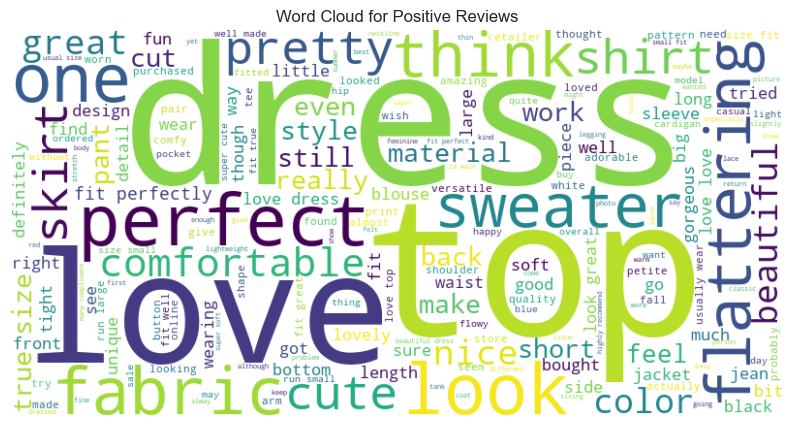

In [75]:
positive_reviews = data[data['Recommend Flag'] == 1]['Cleaned Review']
positive_text = ' '.join(positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Positive Reviews")
plt.axis('off')
plt.show()

## Word cloud for negative reviews

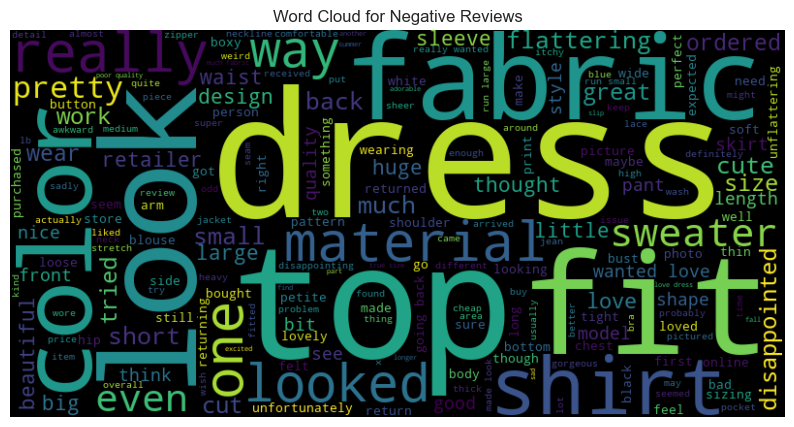

In [80]:
negative_reviews = data[data['Recommend Flag'] == 0]['Cleaned Review']
negative_text = ' '.join(negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Negative Reviews")
plt.axis('off')
plt.show()